# Project: Most likely day of the week a vehicle accident will occur for a given month and person’s profile
### Name: Brandon Takli
### Student ID: 40124336
### Date Submitted: April 10, 2023

## **Abstract**
   Abstract here. Give an executive summary of your project: goal, methods, results, conclusions. Usually no more than 200 words.


## **Introduction**

Here you have to explain the problem that you are solving. Explain why it is important, and what are the main challenges. Mention previous attempts (add papers as references) to solve it. Mainly focus on the techniques closely related to our approach. Briefly describe your approach and explain why it is promising for solving the addressed problem. Mention the dataset and the main results achieved.

In this section, you can add **text** and **figures**.

## **Methodology**
Describe the important steps you took to achieve your goal. Focus more on the most important steps (preprocessing, extra features, model aspects) that turned out to be important. Mention the original aspects of the project and state how they relate to existing work.

In this section, you can add **text** and **figures**. For instance, it is strongly suggested to add a picture of the best machine learning model that you implemented to solve your problem (and describe it).

### Examining the Dataset:
#### Initial Considerations:
The dataset being used for this project is the **2019 National Collision Database** provided on **open.canada.ca**. The dimensions of this data are 272301 rows and 23 columns. There are however certain columns that can be dropped before running profiling tools:
1. C_YEAR: All the data is from 2019, so including C_YEAR is a waste of computation time.
2. P_ID: This is the Person ID, which is irrelevant for us.
3. V_ID: Vehicle ID number, also irrelevant and can result in overfitting
4. C_CASE: Case number, irrelevant for our purposes.

#### Running Data Profiling:
Using [ydata-profiling](https://github.com/ydataai/ydata-profiling) in order to profile our data, we can get some better insights into the dataset and potential items that need to be changed. The raw data profile report is available in the reports/raw_data_profile.html file.
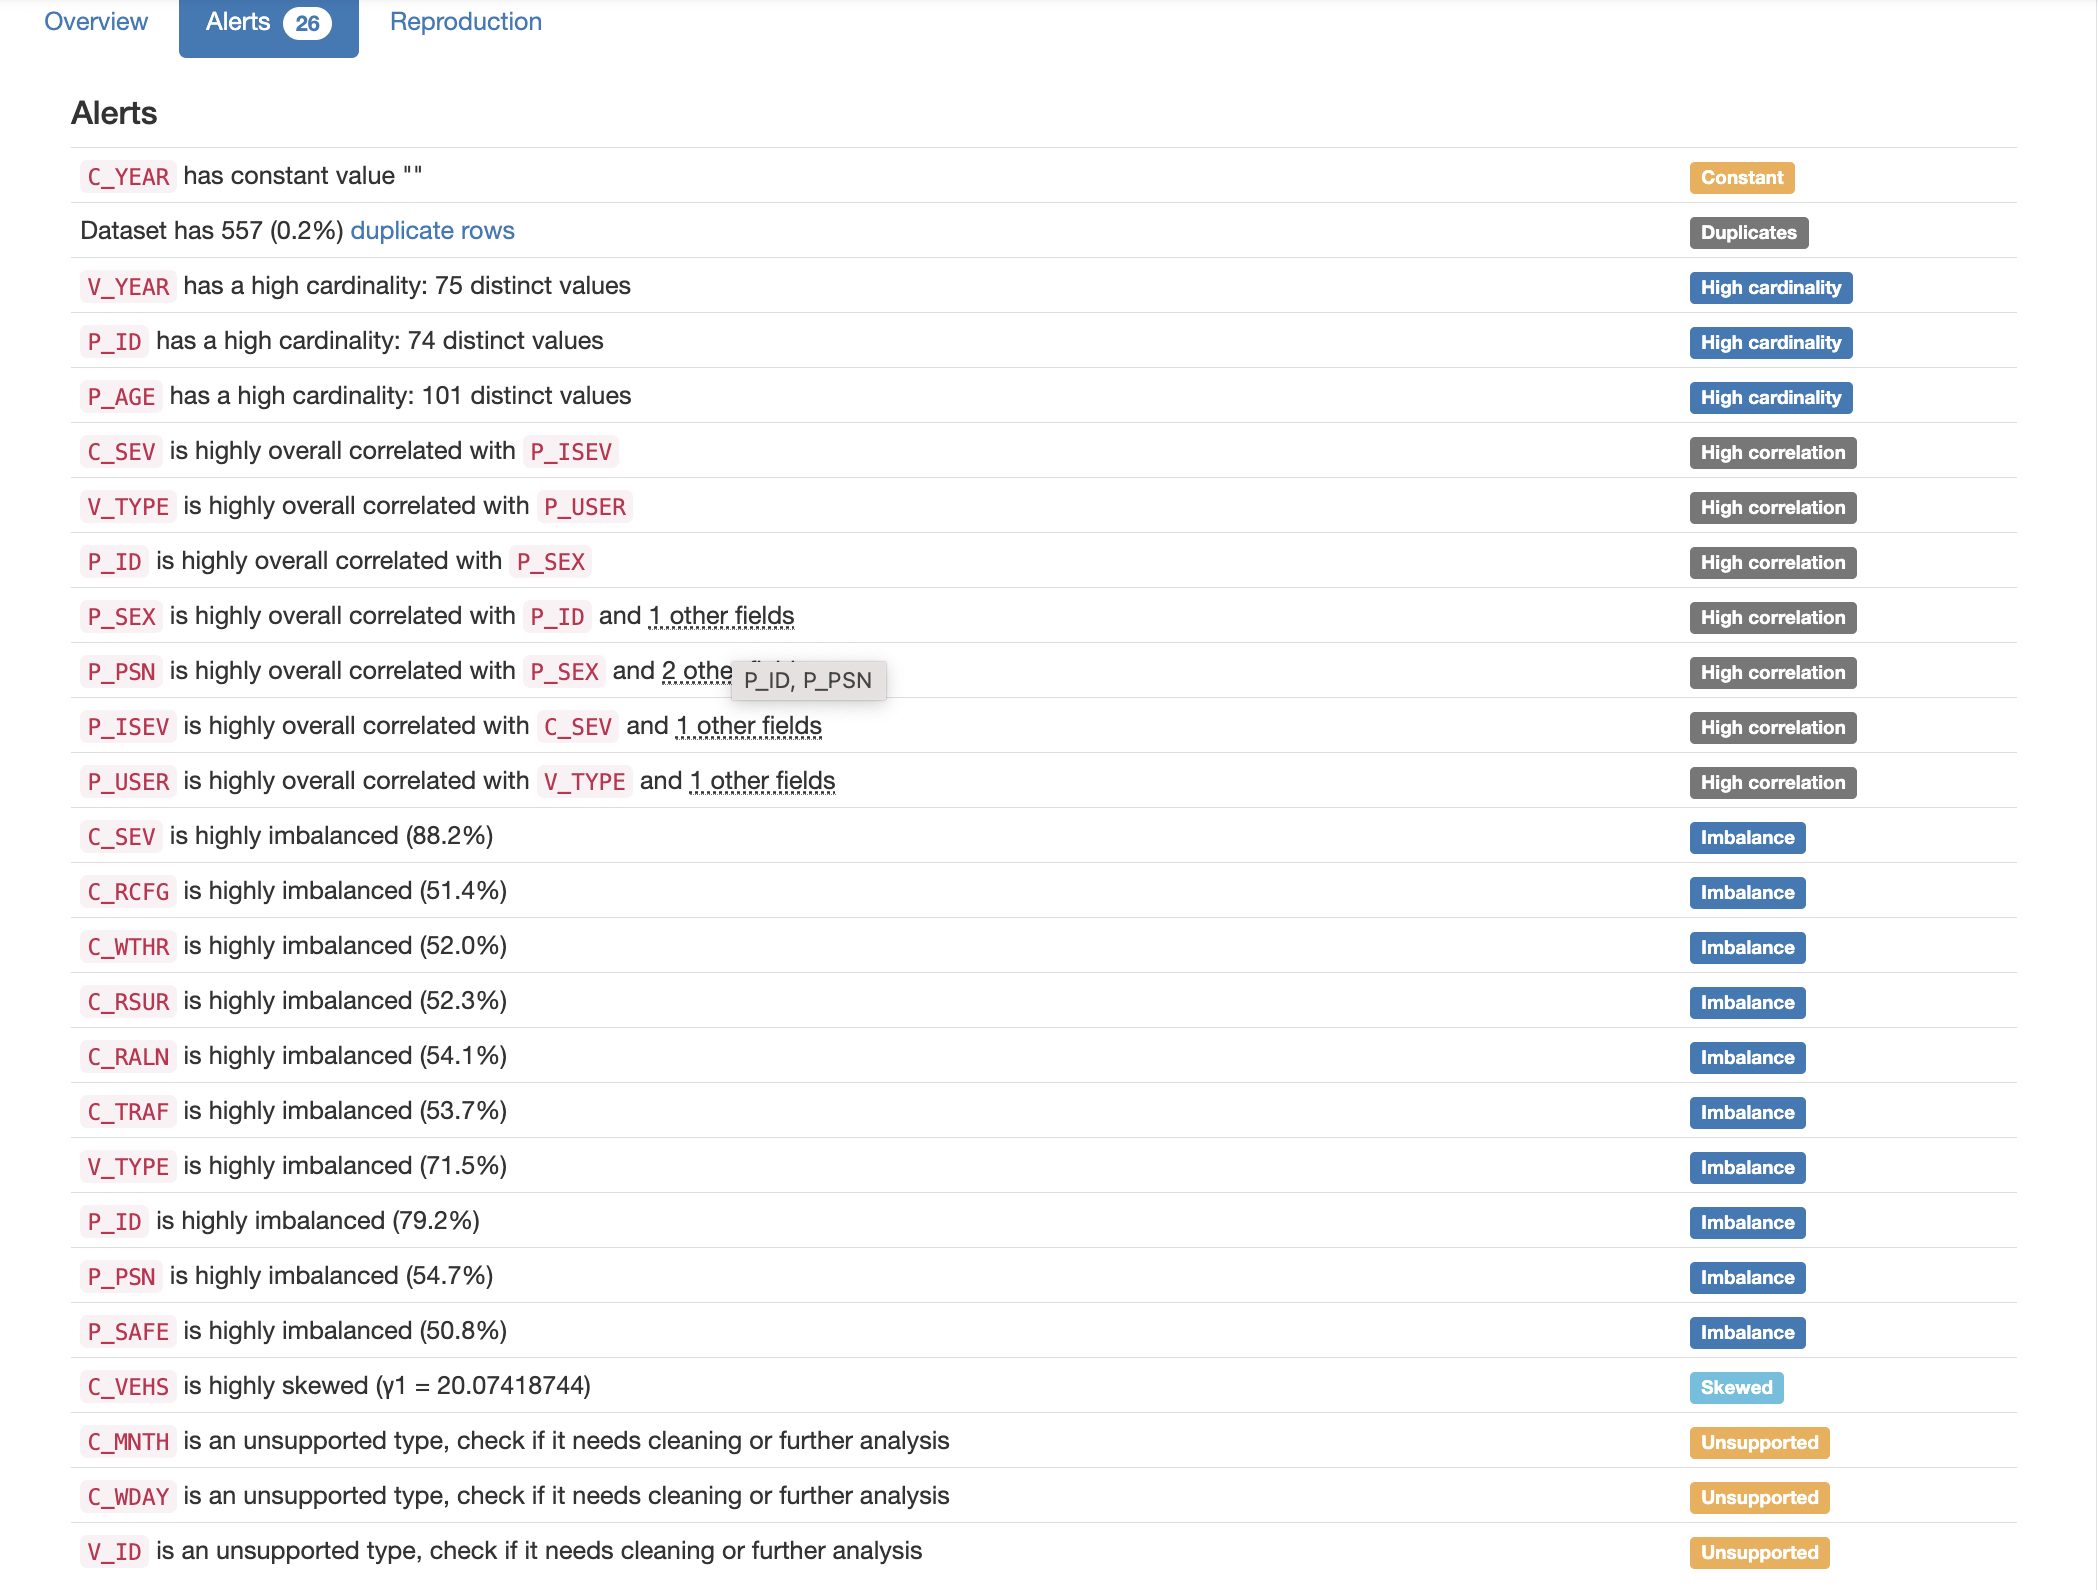

From this we can see that many of our fields are highly imbalanced. The level of imbalance can be quite severe:
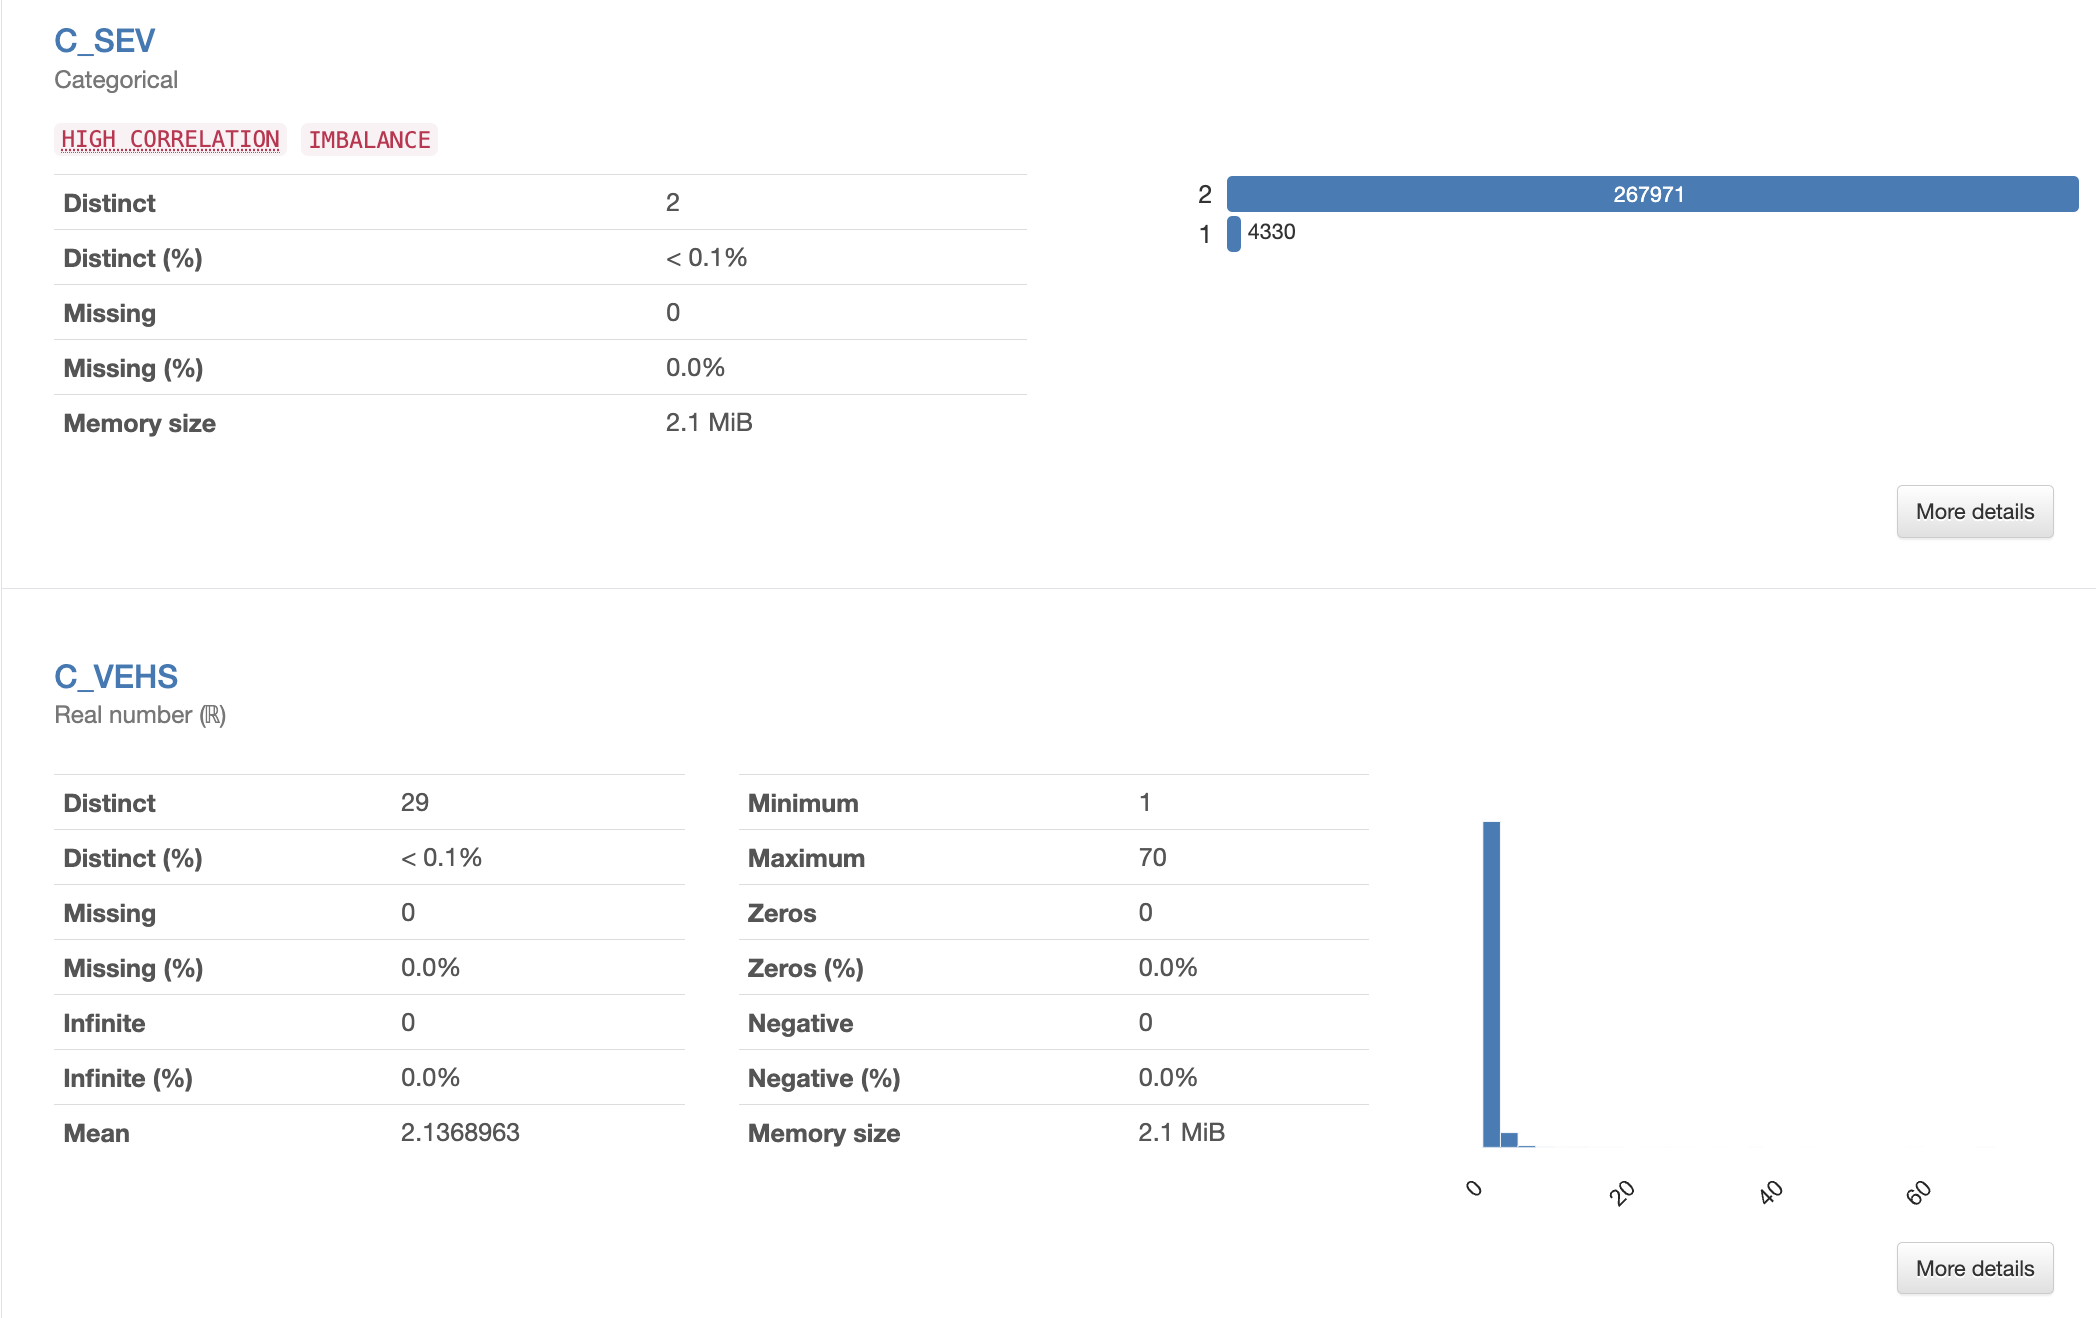

And finally, here's an overall heatmap of correlation:
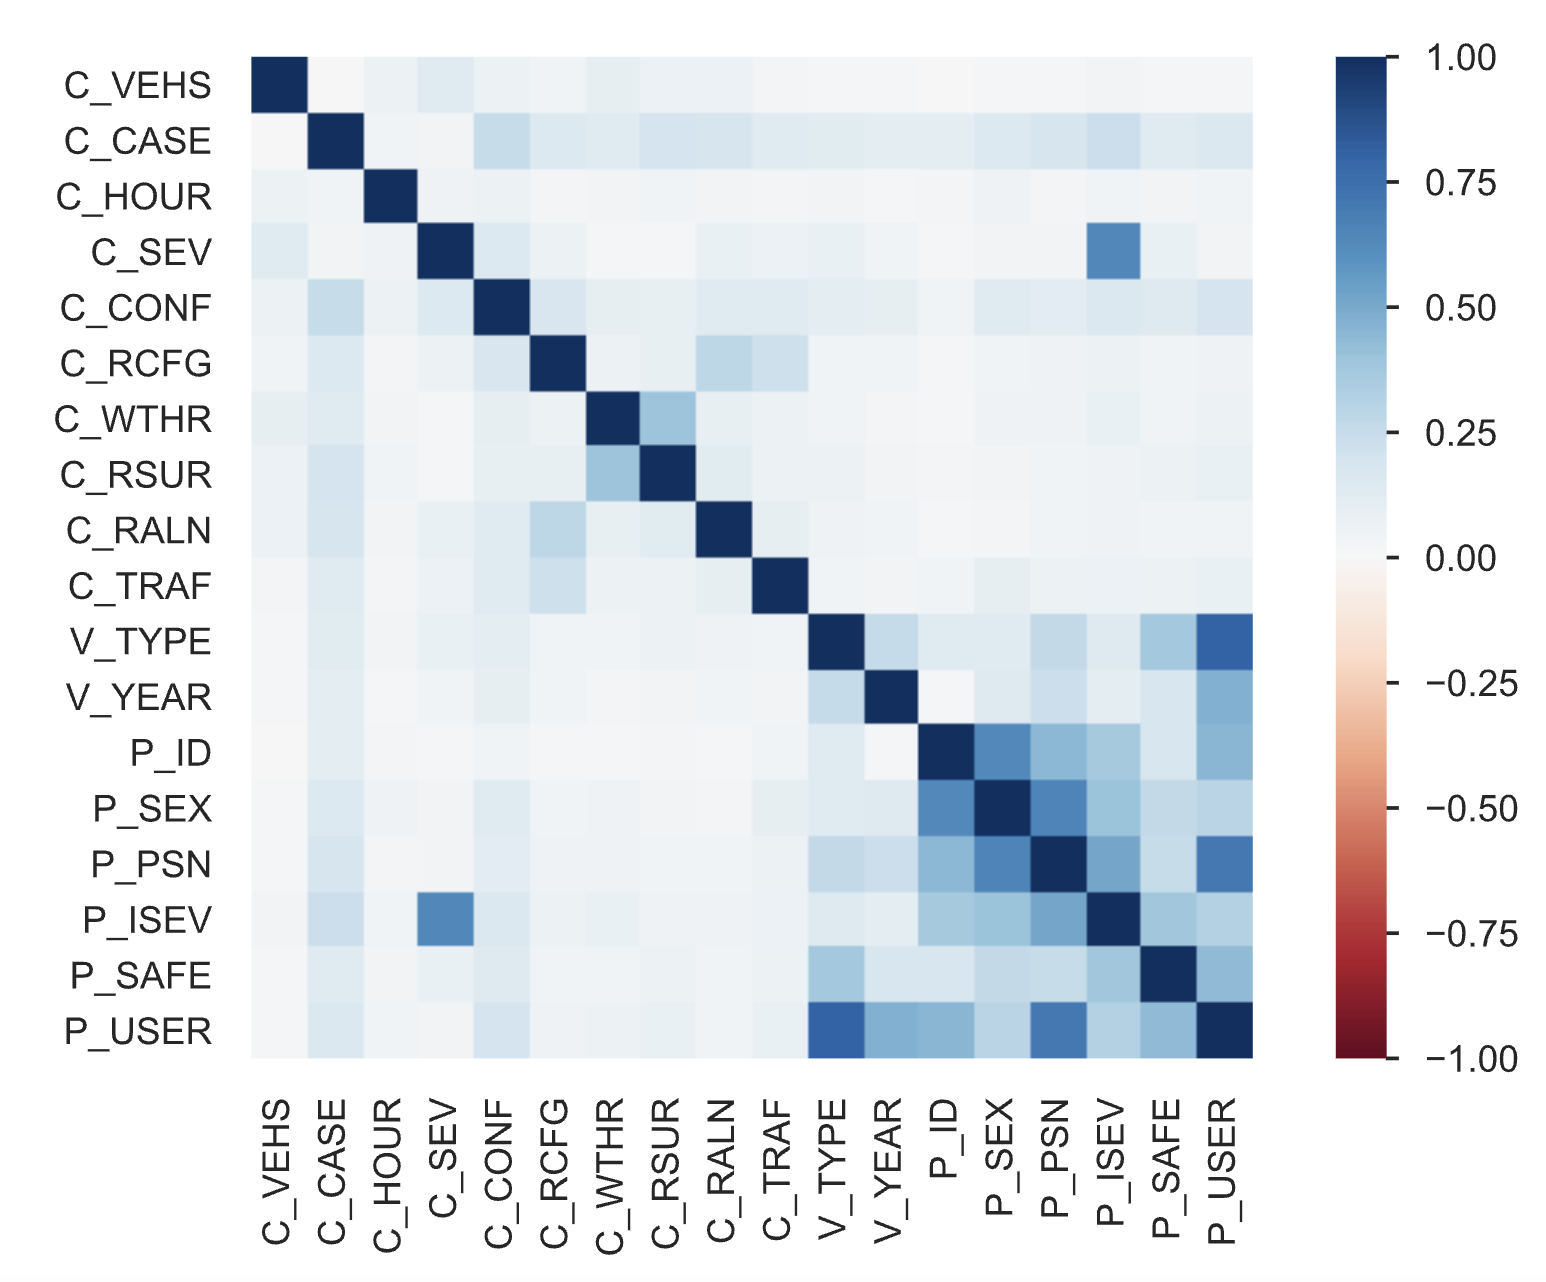

Furthermore, the profiler shows that C_MNTH and C_WDAY are not in a supported format. This is because while most columns are numerical, some have unknown values which are represented by strings such as 'U' or 'UU'. Rows containing these and other strings denoting unknown/uncollected values will need to be dropped.

## **Experimental Setup**
Describe the datasets used for your experiments. List the machine learning techniques used to solve your problem and report the corresponding hyperparameters.

In this section, you can add **text**, **tables**, and **figures**.

## **Experimental Results**
Describe here the main experimental results. Critically discuss them. Compare them with results available in the literature (if applicable). 

In this section, you can add **text** and **figures**, **tables**, **plots**, and code. Make sure the code is runnable and replicable.

### **Code:**

Below is the code used to preprocess the data, train and test all the models of interest, as well as output the results into a series of files.

Both Scikit-learn and Pytorch are used here, with scikit used to get an initial idea and to run the Decision Trees and Random Forest, and Pytorch to attempt to improve the results of the Neural Networks with the greater customizability it offers.

The cell directly below is responsible for cloning the code from my GitHub repository for my functions file. This was done to keep the notebook code clean and offer more readability. All the functions are properly commented and offer type hints.

In [ ]:
!rm -rf COMP432-Project/
!git clone https://github.com/btakli/COMP432-Project
%pip install -r requirements.txt

In [21]:
import os
from pathlib import Path
#import autosklearn.classification as autosklearn
import sklearn
import sklearn.ensemble
import sklearn.model_selection
import sklearn.neural_network
import sklearn.svm
import sklearn.tree
import pandas as pd

import functions as f

#### Preparing Data:

The cell below uses the `f.prepare_data()` function to prepare training and test sets for both the labels and features. The features are one hot encoded as they are all categorical.

**NOTE**: All files will be outputted into the `COMP432-Project` directory. To save time, this can be changed by specifying the file paths below if need be.

In [22]:
# Change working directory to the project folder, 
# given that we are importing it from GitHub. 
# Comment out if you are running this within the project folder on GitHub.
if os.path.exists('./COMP432-Project'):
    os.chdir('./COMP432-Project')


# Prepare data
X_train, X_test, y_train, y_test = f.prepare_data(
    columns_to_drop=['C_SEV', 'P_SAFE'])

# Prepare file paths
# Get parent directory of src
parent_dir = Path().resolve()

model_folder_path = os.path.join(parent_dir, 'models')

test_result_file = os.path.join(parent_dir, 'reports', 'test_results.csv')

training_and_testing_results_file = os.path.join(
    parent_dir, 'reports', 'training_and_testing_comparison_results.csv')


/Users/phantomex2011/Documents/GitHub/COMP432-Project/functions.py:45: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_name, header=0)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Raw data dimensions: [272301 x 23]
   C_YEAR C_MNTH C_WDAY C_HOUR  C_SEV  C_VEHS C_CONF C_RCFG C_WTHR C_RSUR  \
0    2019      1      1     11      2       2     32      1      1      5   
1    2019      1      1     11      2       2     32      1      1      5   
2    2019      1      1     11      2       2     32      1      1      5   
3    2019      1      1     11      2       2     32      1      1      5   
4    2019      1      1     16      2       2     32      1      2      5   

   ... V_TYPE V_YEAR P_ID P_SEX P_AGE P_PSN P_ISEV P_SAFE P_USER   C_CASE  
0  ...      1   2015    1     M    56    QQ      1      2      U  2681651  
1  ...      1   2015   UU     U    UU    UU      U     UU      U  2681651  
2  ...      1   2010    1     F    30    11      2      2      1  2681651  
3  ...      1   2010    2     U     1    QQ      N     NN      U  2681651  
4  ...      1   2007    1     F    27    11      2      2      1  2681652  

[5 rows x 23 columns]

Data size reduction: 1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could n

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Now we can examine the changes made after preprocessing the data:

First of all, from our results we can see the following:

```
Data size reduction: 104498 dropped rows, and 6 dropped columns
yields a data size reduction of 38.38% of rows, and 26.09% of columns
```

After preprocessing and eliminating rows with unknown values, we maanged to reduce our sample size by 38.38%. This shows how much of the data contained unknown features and shows the usefulness of preprocessing our data.

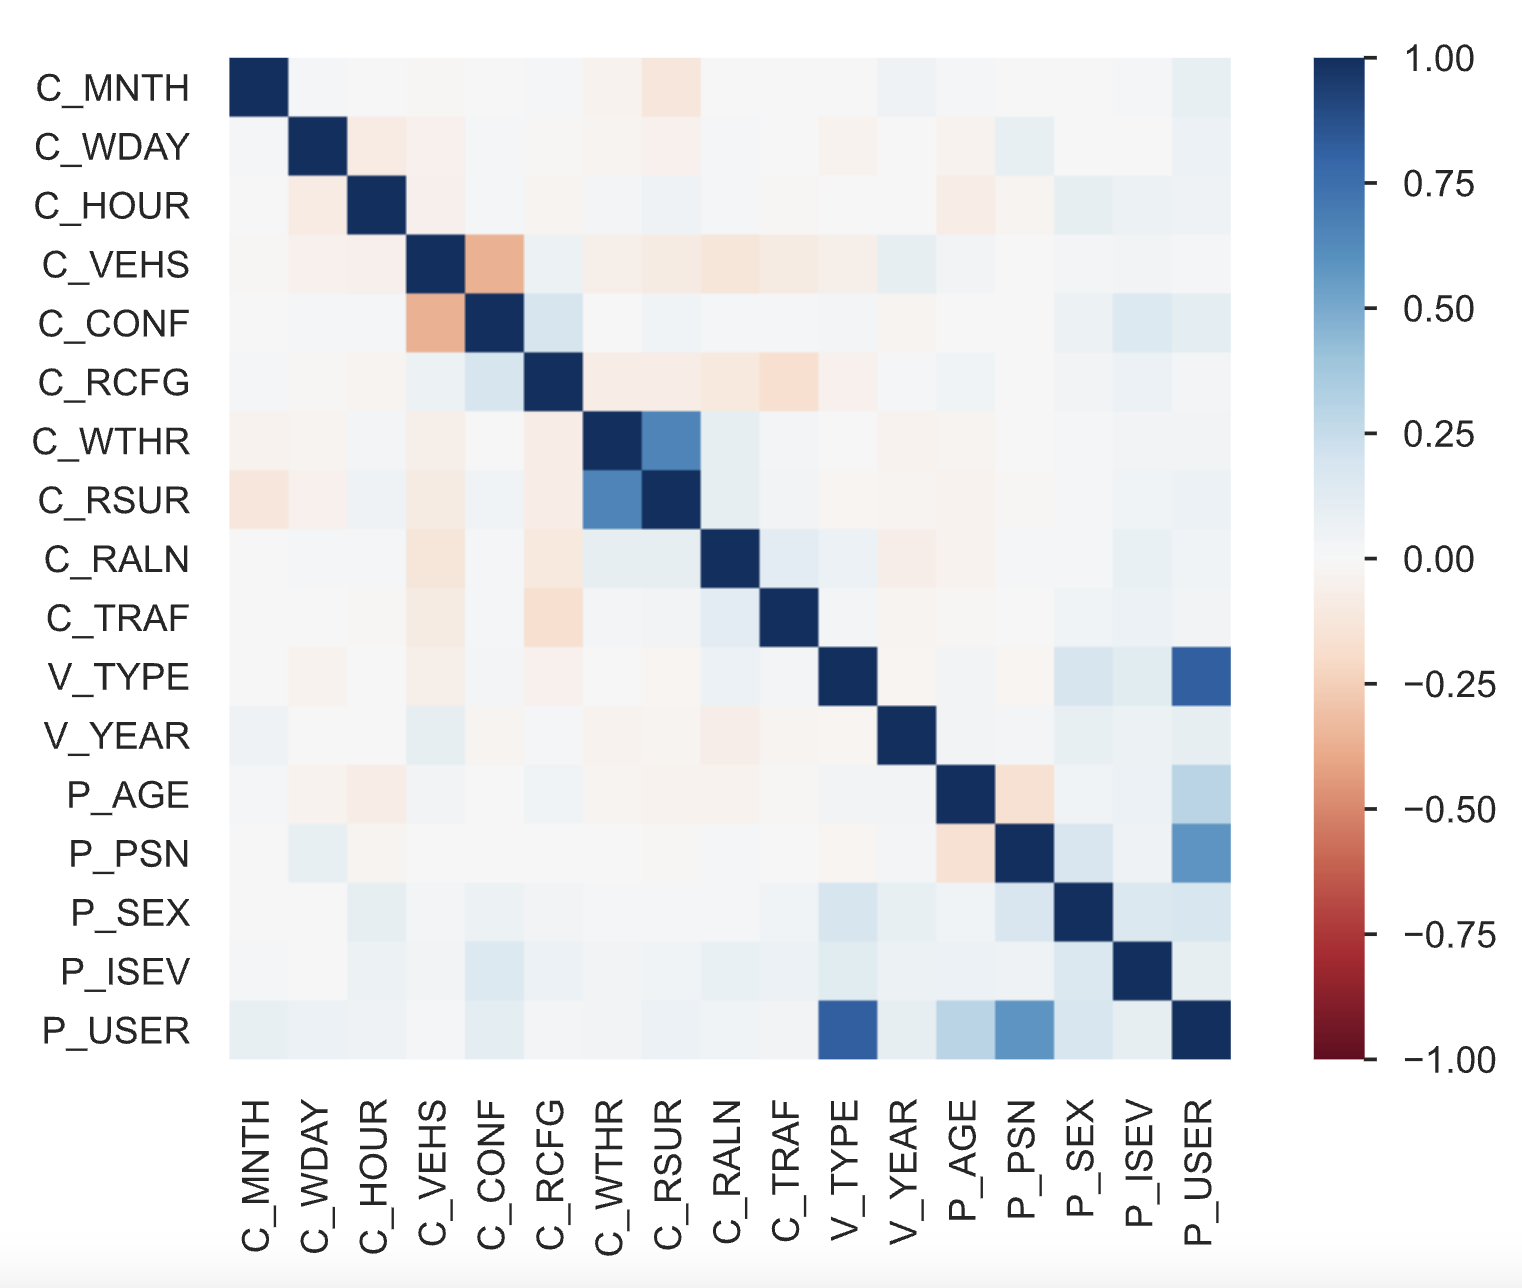

We can also see here that our preprocessing efforts have helped reduce some overly high correlation in features.


Below are the models we are training first using `sklearn`. To save time, overwriting the output files and saved models is set to false by default, but they can be changed easily using the parameters in the `f.train_and_test_models()` function. The reason overwrite_output is set to false by default is that if we used a saved model and overwrote the output, we'd lose the training time value in our test results file, since we did not live train the model that run.

###### IMPORTANT NOTE:
random_forest does not have a saved model uploaded due to the large size of it not being supported on GitHub. Training time is around 1 hour, so be warned. It can be removed from models_to_train if you wish to avoid running it in your own tests. The results are still saved in the `test_results.csv file.`

#### Training Models

In [23]:
models_to_train = {
    "decision_tree": sklearn.tree.DecisionTreeClassifier(random_state=0),
    "mlp": sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=1000, random_state=0, verbose=True),
    "random_forest": sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0, verbose=True, n_jobs=-1),
    "svm": sklearn.svm.LinearSVC(random_state=0, verbose=True),
    "mlp_sgd": sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=5000, random_state=0, verbose=True, solver="sgd"),
}

# Train and test models
f.train_and_test_models(X_train, X_test, y_train, y_test, model_folder_path,
                        models_to_train, test_result_file, overwrite_output=False, overwrite_saved_models=False)


Training model decision_tree...
Model decision_tree already exists. Set overwrite=True to overwrite the model.
Done!
Training model mlp...
Model mlp already exists. Set overwrite=True to overwrite the model.
Done!
Training model random_forest...
Model random_forest already exists. Set overwrite=True to overwrite the model.
Done!
Training model svm...
Model svm already exists. Set overwrite=True to overwrite the model.
Done!
Training model mlp_sgd...
Model mlp_sgd already exists. Set overwrite=True to overwrite the model.
Done!
Loading model decision_tree...
Testing model decision_tree...
Done!
Model decision_tree accuracy: 0.33, F1 score: 0.33
Model decision_tree already exists in test results file. Skipping...
Loading model mlp...
Testing model mlp...
Done!
Model mlp accuracy: 0.27, F1 score: 0.27
Model mlp already exists in test results file. Skipping...
Loading model random_forest...


/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-pa

Testing model random_forest...


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LinearSVC from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Done!
Model random_forest accuracy: 0.39, F1 score: 0.39
Model random_forest already exists in test results file. Skipping...
Loading model svm...
Testing model svm...
Done!
Model svm accuracy: 0.21, F1 score: 0.20
Model svm already exists in test results file. Skipping...
Loading model mlp_sgd...
Testing model mlp_sgd...
Done!
Model mlp_sgd accuracy: 0.31, F1 score: 0.31
Model mlp_sgd already exists in test results file. Skipping...


##### Hyperparameter search:

Next, a hyperparameter search is to be done in order to attempt to improve the performance of the models.

The `scikit-learn` `GridsearchCV` class uses cross validation, automatically choosing a portion of the training set to be the validation set for each run, thus a separate validation set does not need to be created.

###### IMPORTANT NOTE:
Given that this is a hyperparameter search, runtime is very long (aside from the decision tree). It is recommended to use the saved models for these, and once again random forest is not present in the saved models due to being too large, so you may remove it if you wish to run this on your own.

In [24]:
# Hyperparameter search:

# Hyperparameter seach dictionaries
mlp_hyperparameters = {
    "hidden_layer_sizes": [(100, 100, 100), (1000, 500, 100)],
    "max_iter": [1000],
    "random_state": [0],
    "verbose": [True],
    "solver": ["adam", "sgd"],
    "learning_rate": ["constant", "adaptive"],
}

decision_tree_hyperparameters = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 1,  5, 10],
    "min_samples_split": [2, 5, 10],
    "max_features": [None, "sqrt", "log2"],
    "random_state": [0]
}

random_forest_hyperparameters = {
    "n_estimators": [10, 500],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 1, 5],
    "max_features": [None, "sqrt", "log2"],
    "n_jobs": [-1],
    "random_state": [0],
    "verbose": [True],
}

base_mlp = sklearn.neural_network.MLPClassifier(
    random_state=0, verbose=True)
base_decision_tree = sklearn.tree.DecisionTreeClassifier(random_state=0)
base_random_forest = sklearn.ensemble.RandomForestClassifier(
    random_state=0, verbose=True)

# Grid search uses cross validation to find the best hyperparameters, so we don't need to make a separate validation set.
models_to_train_search = {
    "gridsearch_mlp": sklearn.model_selection.GridSearchCV(base_mlp, mlp_hyperparameters, cv=3, verbose=True, n_jobs=-1),
    "gridsearch_decision_tree": sklearn.model_selection.GridSearchCV(base_decision_tree, decision_tree_hyperparameters, cv=3, verbose=True, n_jobs=-1),
    "gridsearch_random_forest": sklearn.model_selection.GridSearchCV(base_random_forest, random_forest_hyperparameters, cv=3, verbose=True, n_jobs=-1)
}

f.train_and_test_models(X_train, X_test, y_train, y_test, model_folder_path,
                        models_to_train_search, test_result_file, overwrite_output=False, overwrite_saved_models=False)


Training model gridsearch_mlp...
Model gridsearch_mlp already exists. Set overwrite=True to overwrite the model.
Done!
Training model gridsearch_decision_tree...
Model gridsearch_decision_tree already exists. Set overwrite=True to overwrite the model.
Done!
Training model gridsearch_random_forest...
Model gridsearch_random_forest already exists. Set overwrite=True to overwrite the model.
Done!
Loading model gridsearch_mlp...
Testing model gridsearch_mlp...


/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Done!
Model gridsearch_mlp accuracy: 0.34, F1 score: 0.34
Model gridsearch_mlp already exists in test results file. Skipping...
Loading model gridsearch_decision_tree...
Testing model gridsearch_decision_tree...
Done!
Model gridsearch_decision_tree accuracy: 0.33, F1 score: 0.33
Model gridsearch_decision_tree already exists in test results file. Skipping...
Loading model gridsearch_random_forest...


/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/

Testing model gridsearch_random_forest...


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.7s


Done!
Model gridsearch_random_forest accuracy: 0.40, F1 score: 0.40
Model gridsearch_random_forest already exists in test results file. Skipping...


[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.0s finished


#### Results:

In this results section, we are comparing the training and testing accuracy of the models, as well as plotting the loss curves for compatible models. We will also print out the tables here for easier viewing, but they are best viewed in full detail in the CSV files for the hyperparameters, as the values are quite long.

In [25]:
# Compare training and testing accuracy and f1-score for each model
print("Comparing training and testing accuracy and f1-score...")
for model_name in models_to_train | models_to_train_search:
    f.compare_training_and_testing_accuracy(model_name, model_folder_path, X_train, X_test, y_train, y_test,
                                                training_and_testing_results_file, overwrite_output=True)
# Plot the loss curve of each model
for model_name in models_to_train | models_to_train_search:
    f.plot_loss_curve(model_name, model_folder_path, os.path.join(
        parent_dir, 'reports', 'figures'))

Comparing training and testing accuracy and f1-score...
Model decision_tree training accuracy: 1.00, training F1 score: 1.00
Model decision_tree testing accuracy: 0.33, testing F1 score: 0.33


/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Model mlp training accuracy: 0.65, training F1 score: 0.65
Model mlp testing accuracy: 0.27, testing F1 score: 0.27


/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Do

Model random_forest training accuracy: 1.00, training F1 score: 1.00
Model random_forest testing accuracy: 0.39, testing F1 score: 0.39
Model svm training accuracy: 0.22, training F1 score: 0.21
Model svm testing accuracy: 0.21, testing F1 score: 0.20
Model mlp_sgd training accuracy: 0.65, training F1 score: 0.65
Model mlp_sgd testing accuracy: 0.31, testing F1 score: 0.31
Model is a gridsearch object. Getting best estimator...


/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Model gridsearch_mlp training accuracy: 0.99, training F1 score: 0.99
Model gridsearch_mlp testing accuracy: 0.34, testing F1 score: 0.34
Model is a gridsearch object. Getting best estimator...
Model gridsearch_decision_tree training accuracy: 1.00, training F1 score: 1.00
Model gridsearch_decision_tree testing accuracy: 0.33, testing F1 score: 0.33


/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/

Model is a gridsearch object. Getting best estimator...


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.3s finished
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.p

Model gridsearch_random_forest training accuracy: 1.00, training F1 score: 1.00
Model gridsearch_random_forest testing accuracy: 0.40, testing F1 score: 0.40
Model decision_tree does not have a loss curve. Skipping plotting...


/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LinearSVC from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Model random_forest does not have a loss curve. Skipping plotting...
Model svm does not have a loss curve. Skipping plotting...
Model is a gridsearch object. Getting best estimator...
Model is a gridsearch object. Getting best estimator...
Model gridsearch_decision_tree does not have a loss curve. Skipping plotting...
Model is a gridsearch object. Getting best estimator...
Model gridsearch_random_forest does not have a loss curve. Skipping plotting...


## **Conclusions**

Summarize what you could and could not conclude based on your experiments. 
In this section, you can add **text**.



## **References**
You can add here the citations of books, websites, or academic papers, etc.